# NAM 2019 pMuTT Workshop

Instructions and materials for the "Theory, Applications, and Tools for Kinetic Modeling" workshop can be found on [our documentation page](https://vlachosgroup.github.io/pMuTT/nam_2019.html).


# Table of Contents

| **1\. [Virtual Kinetic Laboratory Ecosystem](#section_1)**

| **2\. [Useful Links](#section_2)**

| **3\. [Constants](#section_3)**

|-- **3.1. [Access common constants in appropriate units](#section_3_1)**

|-- **3.2. [Convert between units](#section_3_2)**

|-- **3.3. [Convert between equivalent quantities](#section_3_3)**

| **4\. [Exercise 1](#section_4)**

| **5\. [Creating statistical mechanical objects using StatMech](#section_5)**

|-- **5.1. [Supported StatMech models](#section_5_1)**

|--|-- **5.1.1 [Translations](#section_5_1_1)**

|--|-- **5.1.2. [Vibrations](#section_5_1_2)**

|--|-- **5.1.3. [Rotations](#section_5_1_3)**

|--|-- **5.1.4. [Electronic](#section_5_1_4)**

|--|-- **5.1.5. [Miscellaneous](#section_5_1_5)**

|-- **5.2. [Initializing StatMech modes individually](#section_5_2)**

|-- **5.3. [Initializing StatMech modes using presets](#section_5_3)**

| **6\. [Plot Thermodynamic Quantities](#section_6)**

| **7\. [Exercise 2](#section_7)**

| **8\. [Creating empirical objects](#section_8)**

|-- **8.1. [Inputting a NASA polynomial directly](#section_8_1)**

|-- **8.2. [Fitting an empirical object to a StatMech object](#section_8_2)**

| **9\. [Input/Output](#section_9)**

|-- **9.1. [Input via Excel](#section_9_1)**

|-- **9.2. [Output via Thermdat](#section_9_2)**

| **10\. [Reactions](#section_10)**

| **11\. [Exercise 3](#section_11)**

| **12\. [Solutions](#section_12)**

|-- **12.1. [Solution 1](#section_12_1)**

|-- **12.2. [Solution 2](#section_12_2)**

|-- **12.3. [Solution 3](#section_12_3)**

<a id='section_1'></a>

# 1. Virtual Kinetic Laboratory Ecosystem

<img src="images/SoftwareEcosystem1.svg" width=600>


<img src="images/pmutt_logo.png" width=400>

- Estimates thermochemical and kinetic parameters using statistical mechanics, transition state theory
- Writes input files for kinetic models and eases thermodynamic analysis
- Implemented in Python
  - Easy to learn
  - Heavily used in scientific community
  - Object-oriented approach is a natural analogy to chemical phenomenon
- Library approach allows users to define the starting point and end point

<img src="images/workflow.png" width=600>


<a id='section_2'></a>

# 2. Useful Links

- [Documentation](https://vlachosgroup.github.io/pMuTT/): find the most updated documentation
- [Issues](https://github.com/VlachosGroup/pmutt/issues): report bugs, request features, receive help
- [Examples](https://vlachosgroup.github.io/pMuTT/examples.html): see examples

<a id='section_3'></a>

# 3. Constants

The [constants module](https://vlachosgroup.github.io/pMuTT/constants.html) has a wide variety of functions for constants and unit conversion.

<a id='section_3_1'></a>

## 3.1. Access common constants in appropriate units
Below, we access Planck's constant in J s.

In [1]:
from pmutt import constants as c

h1 = c.h('eV s', bar=True)
print('h = {} eV s'.format(h1))

h = 6.582119513926018e-16 eV s


<a id='section_3_2'></a>

## 3.2. Convert between units
Below, we convert 12 atm of pressure to psi.

In [2]:
from pmutt import constants as c

P_atm = 12. # atm
P_psi = c.convert_unit(num=P_atm, initial='atm', final='psi')

print('{} atm = {} psi'.format(P_atm, P_psi))

12.0 atm = 176.35175185906093 psi


<a id='section_3_3'></a>

## 3.3. Convert between equivalent quantities
Below, we convert 1000 wavenumbers (cm-1) to frequency.

In [3]:
from pmutt import constants as c

wave_num = 1000. # cm-1
freq = c.wavenumber_to_freq(wave_num) # Hz

print('{} cm-1 = {} Hz'.format(wave_num, freq))

1000.0 cm-1 = 29979245800000.0 Hz


<a id='section_4'></a>

# 4. Exercise 1

Using `pmutt.constants`, calculate the dimensionless enthalpy (H/RT) using the following information:
- H = 0.5 eV
- T = 77 F

In [4]:
# Fill in your answer for Exercise 1 here


<a id='section_5'></a>

# 5. Creating statistical mechanical objects using StatMech

Molecules show translational, vibrational, rotational, electronic, and nuclear modes.

<img src="images/statmech_modes.jpg" width=800>

<a id='section_5_1'></a>

## 5.1. Supported StatMech modes

<img src="images/StatMech2.svg" width=800>

The StatMech object allows us to specify translational, vibrational, rotational, electronic and nuclear modes independently, which gives flexibility in what behavior you would like. Below are the available modes.

<a id='section_5_1_1'></a>

### 5.1.1. Translations
- [``FreeTrans``](https://vlachosgroup.github.io/pMuTT/statmech.html#freetrans) - Translations assuming no intermolecular interactions

<a id='section_5_1_2'></a>

### 5.1.2. Vibrations
- [``HarmonicVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#harmonicvib) - Harmonic vibrations
- [``QRRHOVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#harmonicvib) - Quasi rigid rotor harmonic oscillator. Low frequency modes are treated as rigid rotations.
- [``EinsteinVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#einsteinvib) - Each atom in the crystal vibrates as independent 3D harmonic oscillators
- [``DebyeVib``](https://vlachosgroup.github.io/pMuTT/statmech.html#debyevib) - Improves upon ``EinsteinVib`` by considering simultaneous vibrations. Improves accuracy at lower temperatures.

<a id='section_5_1_3'></a>

### 5.1.3. Rotations
- [``RigidRotor``](https://vlachosgroup.github.io/pMuTT/statmech.html#rigidrotor) - Molecule can be rotated with no change in bond properties

<a id='section_5_1_4'></a>

### 5.1.4. Electronic
- [``GroundStateElec``](https://vlachosgroup.github.io/pMuTT/statmech.html#groundstateelec) - Electronic ground state of the system
- [``LSR``](https://vlachosgroup.github.io/pMuTT/statmech.html#linear-scaling-relationships-lsrs) - Linear Scaling Relationship to estimate binding energies using reference adsorbate

<a id='section_5_1_5'></a>

### 5.1.5. Miscellaneous
- [``EmptyMode``](https://vlachosgroup.github.io/pMuTT/statmech.html#empty-mode) - Default mode if not specified. Does not contribute to any properties
- [``ConstantMode``](https://vlachosgroup.github.io/pMuTT/statmech.html#constant-mode) - Specify arbitrary values to thermodynamic quantities

Using a ``StatMech`` mode gives you access to all the common thermodynamic properties.

<img src="images/StatMech_obj.png" width=400>

For this example, we will use a hydrogen molecule as an ideal gas:
- translations with no interaction between molecules
- harmonic vibrations
- rigid rotor rotations
- ground state electronic structure
- no contribution from nuclear modes.

<img src="images/H2_1.jpg" width=200>

<a id='section_5_2'></a>

## 5.2. Initializing StatMech modes individually

In [5]:
from ase.build import molecule
from pmutt.statmech import StatMech, trans, vib, rot, elec

H2_atoms = molecule('H2')

'''Translational'''
H2_trans = trans.FreeTrans(n_degrees=3, atoms=H2_atoms)

'''Vibrational'''
H2_vib = vib.HarmonicVib(vib_wavenumbers=[4342.]) # vib_wavenumbers in cm-1

'''Rotational'''
H2_rot = rot.RigidRotor(symmetrynumber=2, atoms=H2_atoms)

'''Electronic'''
H2_elec = elec.GroundStateElec(potentialenergy=-6.77,spin=0) # potentialenergy in eV

'''StatMech Initialization'''
H2_statmech = StatMech(name='H2',
                       trans_model=H2_trans,
                       vib_model=H2_vib,
                       rot_model=H2_rot,
                       elec_model=H2_elec)

'''Calculate thermodynamic properties'''
H_statmech = H2_statmech.get_H(T=298., units='kJ/mol')
S_statmech = H2_statmech.get_S(T=298., units='J/mol/K')
print('H_H2(T=298 K) = {:.1f} kJ/mol'.format(H_statmech))
print('S_H2(T=298 K) = {:.2f} J/mol/K'.format(S_statmech))

H_H2(T=298 K) = -618.6 kJ/mol
S_H2(T=298 K) = 130.23 J/mol/K


<a id='section_5_3'></a>

## 5.3. Initializing StatMech modes using presets

Commonly used models can be accessed via [``presets``](https://vlachosgroup.github.io/pMuTT/statmech.html#presets). The currently supported models are:

- [``idealgas``](https://vlachosgroup.github.io/pMuTT/statmech.html#ideal-gas-idealgas) - Ideal gases
- [``harmonic``](https://vlachosgroup.github.io/pMuTT/statmech.html#harmonic-approximation-harmonic) - Typical for surface species
- [``electronic``](https://vlachosgroup.github.io/pMuTT/statmech.html#electronic-electronic) - Only has electronic modes
- [``placeholder``](https://vlachosgroup.github.io/pMuTT/statmech.html#placeholder-placeholder) - No contribution to any property
- [``constant``](https://vlachosgroup.github.io/pMuTT/statmech.html#constant-constant) - Use arbitrary constants to thermodynamic properties


In [6]:
from ase.build import molecule
from pmutt.statmech import StatMech, presets

H2_statmech = StatMech(atoms=molecule('H2'),
                       vib_wavenumbers=[4342.], # cm-1
                       symmetrynumber=2,
                       potentialenergy=-6.77, # eV
                       spin=0.,
                       **presets['idealgas'])

'''Calculate thermodynamic properties'''
H_statmech = H2_statmech.get_H(T=298., units='kJ/mol')
S_statmech = H2_statmech.get_S(T=298., units='J/mol/K')
print('H_H2(T=298 K) = {:.1f} kJ/mol'.format(H_statmech))
print('S_H2(T=298 K) = {:.2f} J/mol/K'.format(S_statmech))

H_H2(T=298 K) = -618.6 kJ/mol
S_H2(T=298 K) = 130.23 J/mol/K


<a id='section_6'></a>

# 6. Plot Thermodynamic Quantities
Use [`pmutt.plot_1D`](https://vlachosgroup.github.io/pMuTT/visual.html#plot-1d) and [`pmutt.plot_2D`](https://vlachosgroup.github.io/pMuTT/visual.html#plot-2d) to plot any function with respect to 1 or 2 variables.

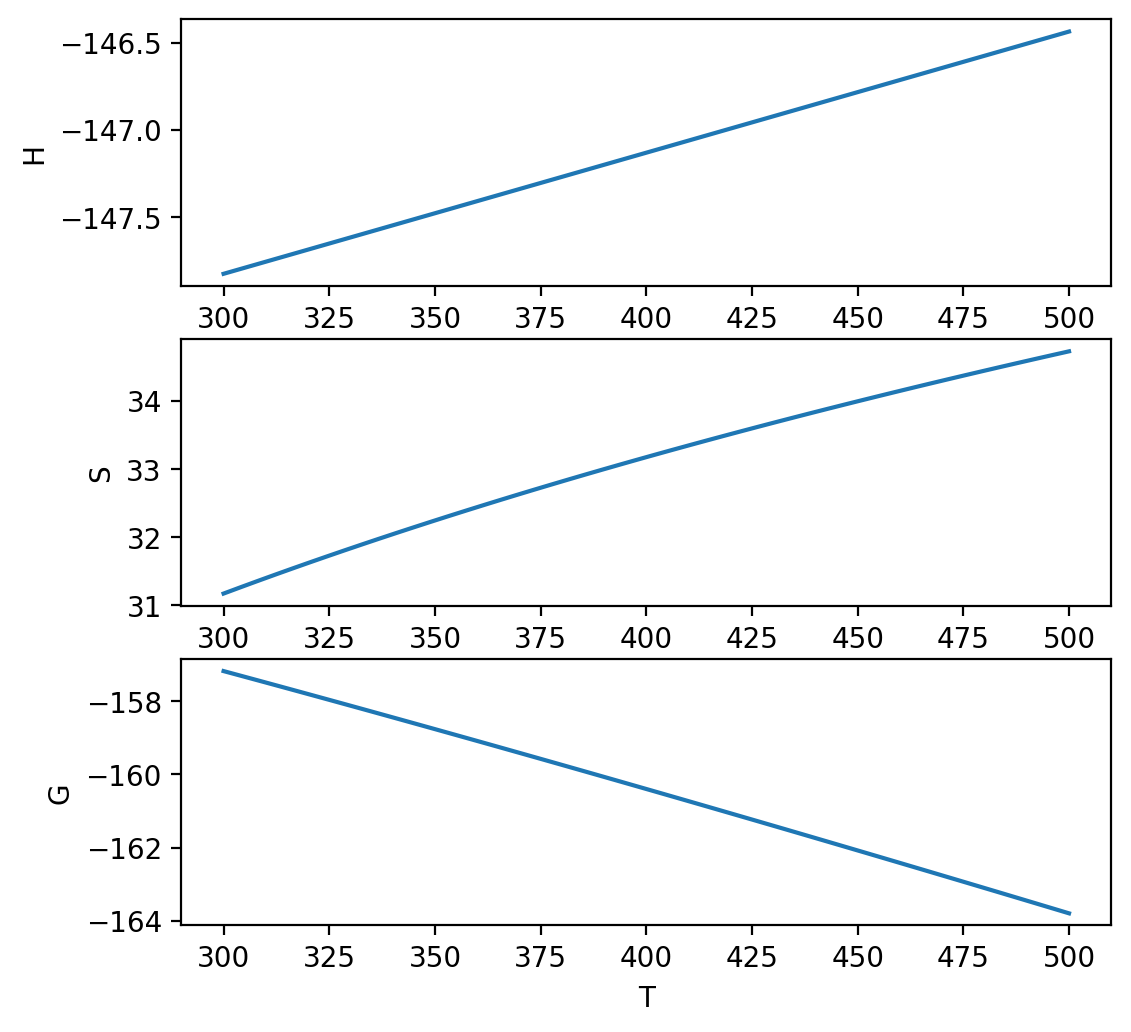

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from pmutt import plot_1D, plot_2D

T = np.linspace(300., 500.)

f1, ax1 = plot_1D(H2_statmech,
                  x_name='T', x_values=T,
                  methods=('get_H', 'get_S', 'get_G'),
                  get_H_kwargs={'units': 'kcal/mol'},
                  get_S_kwargs={'units': 'cal/mol/K'},
                  get_G_kwargs={'units': 'kcal/mol'})
f1.set_size_inches(6, 6)
f1.set_dpi(200)
plt.show()

<a id='section_7'></a>

# 7. Exercise 2

1. Create a ``StatMech`` object for ideal gas-phase H2O. The necessary inputs are given below.

|            Parameter           |             Value            |
|--------------------------------|------------------------------|
|              atoms             |       `molecule('H2O')`      |
|      Potential Energy (eV)     |            -6.7598           |
|         Symmetry number        |               2              |
|              Spin              |               0              |
| Vibrational Wavenumbers (cm-1) | 3825.434, 3710.264, 1582.432 |

2. Calculate the Gibbs energy in eV for H2O at T = 500 K and P = 2 bar.

3. Create a ``StatMech`` object for a Cu crystal using the ``DebyeVib`` model for the vibration mode and ``GroundStateElec`` model for electronic mode. The necessary inputs are given below.

| Parameter              | Value      |
|------------------------|------------|
| Debye Temperature (K)  | 310        |
| Interaction energy (eV)| 0          |
| Potential energy (eV)  | -14.922356 |

4. Plot the H (in eV) and S (in eV/K) for Cu between T = 300 - 700 K.

In [8]:
# Fill in your answer for Exercise 2 here

# 1.


# 2.


# 3.


# 4.


<a id='section_8'></a>

# 8. Creating empirical objects
Currently, pMuTT supports [NASA polynomials](https://vlachosgroup.github.io/pMuTT/empirical.html#nasa) and [Shomate polynomials](https://vlachosgroup.github.io/pMuTT/empirical.html#shomate). They can be initialized in three ways:
- passing in the polynomials directly
- from a model (e.g. ``StatMech``, ``Shomate``) (``from_model``)
- from heat capacity, enthalpy and entropy data (``from_data``)

<img src="images/nasa_func1.png" width=400>

<a id='section_8_1'></a>

## 8.1. Inputting a NASA polynomial directly

The H2 NASA polynomial from the [Burcat database](http://combustion.berkeley.edu/gri_mech/version30/files30/thermo30.dat) is represented as:

```
H2                TPIS78H   2               G   200.000  3500.000  1000.000    1
 3.33727920E+00-4.94024731E-05 4.99456778E-07-1.79566394E-10 2.00255376E-14    2
-9.50158922E+02-3.20502331E+00 2.34433112E+00 7.98052075E-03-1.94781510E-05    3
 2.01572094E-08-7.37611761E-12-9.17935173E+02 6.83010238E-01                   4
```

This can be translated to pMuTT syntax using:

H_H2(T=298 K) = -0.0010337769809016294 kcal/mol


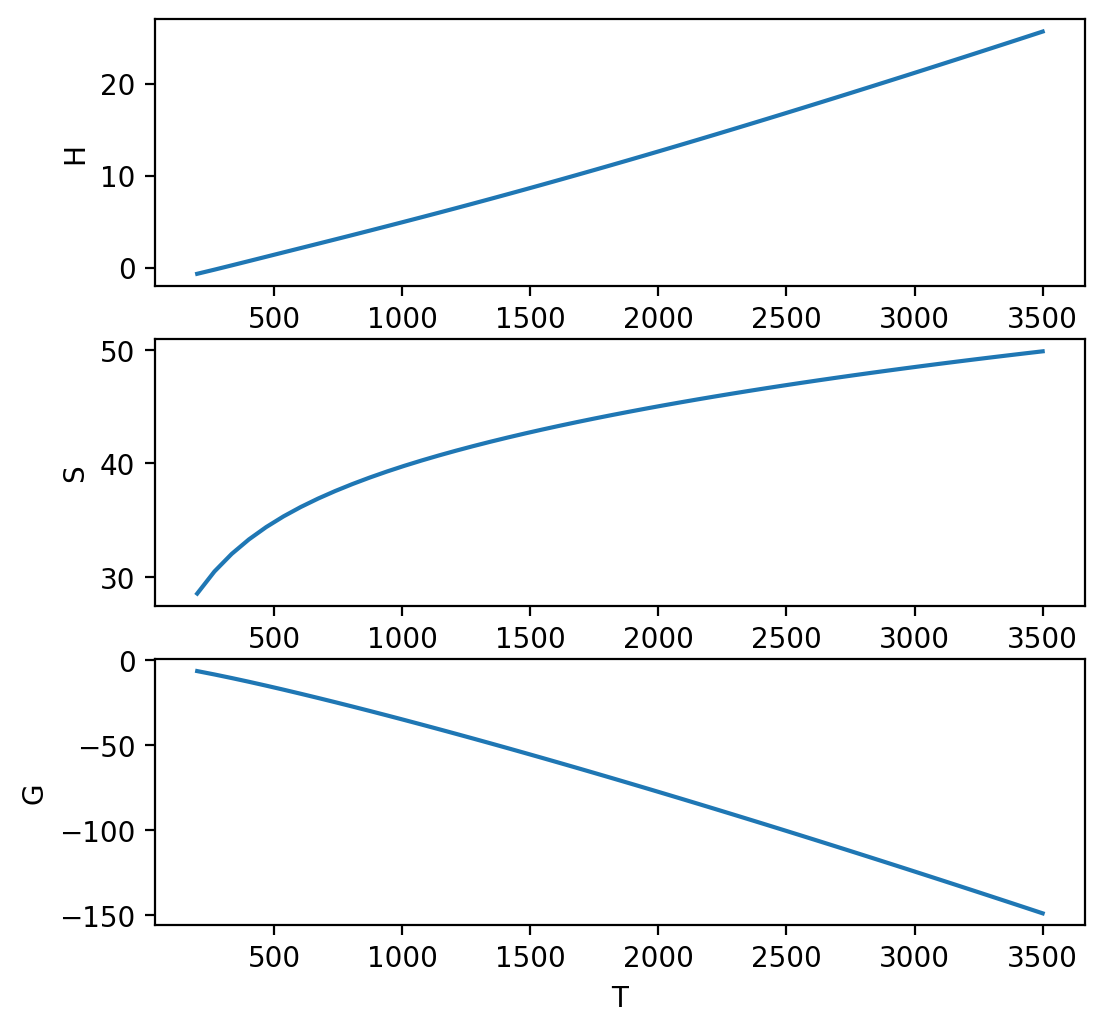

In [9]:
from pmutt.empirical.nasa import Nasa

# Initialize NASA polynomial
H2_nasa = Nasa(name='H2',
               elements={'H': 2},
               phase='G',
               T_low=200., T_mid=1000., T_high=3500.,
               a_low=[2.34433112E+00, 7.98052075E-03, -1.94781510E-05,
                      2.01572094E-08, -7.37611761E-12, -9.17935173E+02,
                      6.83010238E-01],
               a_high=[3.33727920E+00, -4.94024731E-05, 4.99456778E-07,
                       -1.79566394E-10, 2.00255376E-14, -9.50158922E+02,
                       -3.20502331E+00])

# Calculate thermodynamic quantities using the same syntax as StatMech
H_H2 = H2_nasa.get_H(units='kcal/mol', T=298.)
print('H_H2(T=298 K) = {} kcal/mol'.format(H_H2))

# Show thermodynamic quantities vs. T
T = np.linspace(200., 3500.)
f2, ax2 = plot_1D(H2_nasa,
                  x_name='T', x_values=T,
                  methods=('get_H', 'get_S', 'get_G'),
                  get_H_kwargs={'units': 'kcal/mol'},
                  get_S_kwargs={'units': 'cal/mol/K'},
                  get_G_kwargs={'units': 'kcal/mol'})
f2.set_size_inches(6, 6)
f2.set_dpi(200)
plt.show()

<a id='section_8_2'></a>

## 8.2. Fitting an empirical object to a StatMech object
Empirical objects can be made directly using ``StatMech`` objects and the ``from_model`` method.

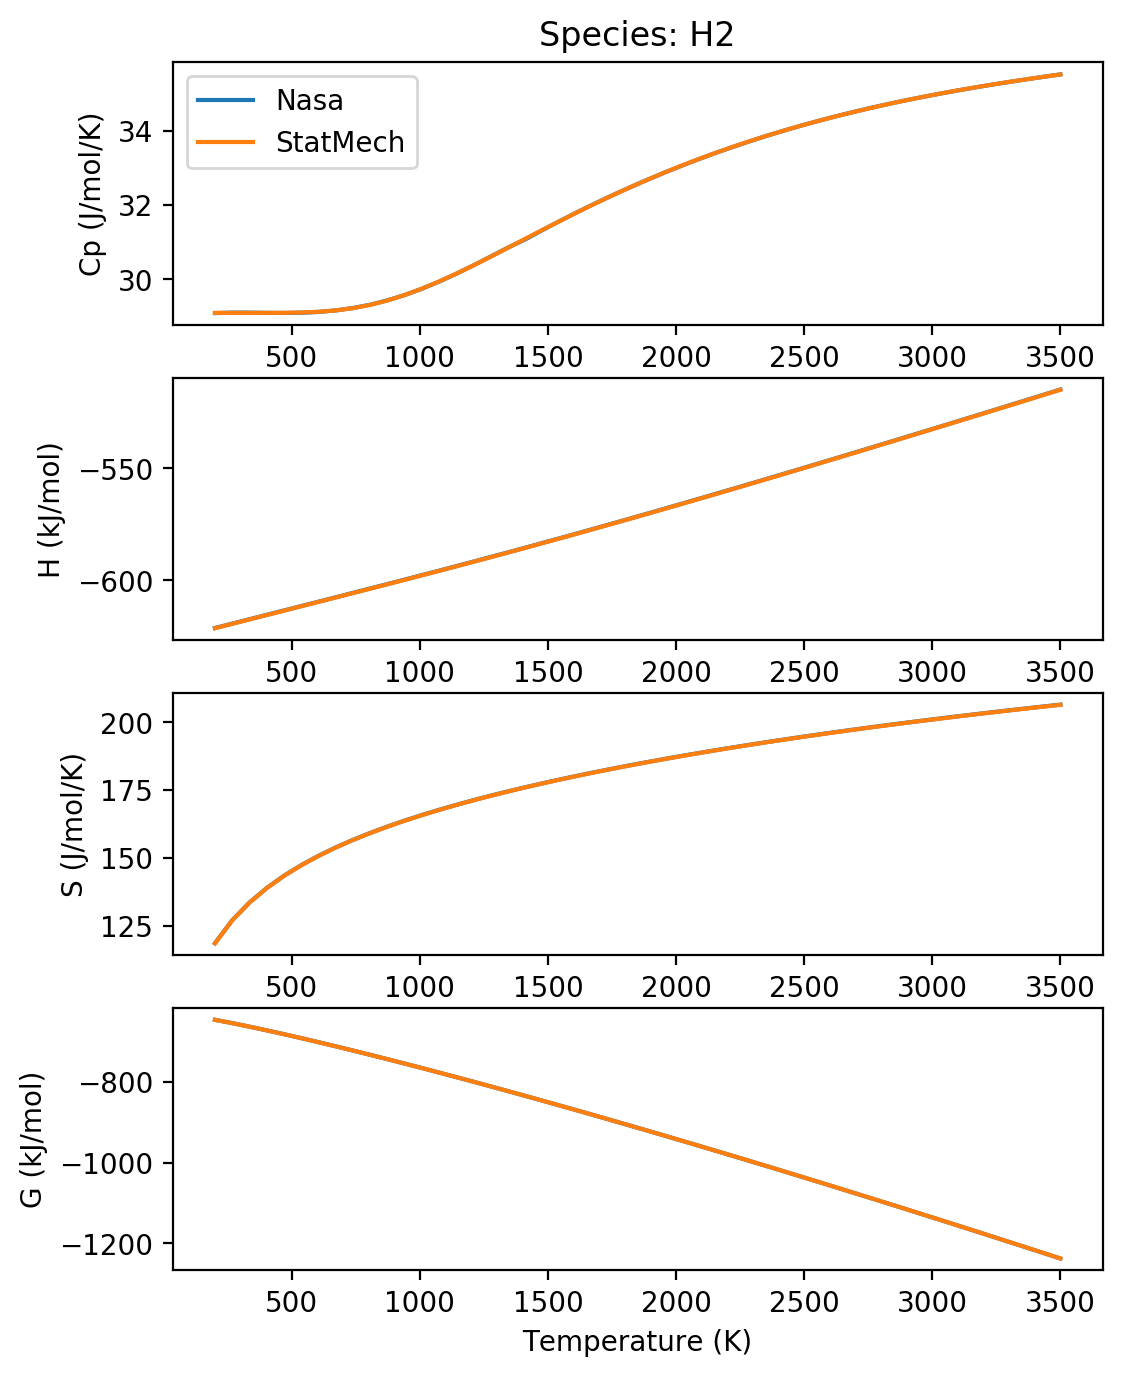

In [10]:
H2_nasa = Nasa.from_model(name='H2',
                          T_low=200.,
                          T_high=3500.,
                          model=H2_statmech)

# Compare the statistical mechanical model to the empirical model
f3, ax3 = H2_nasa.plot_statmech_and_empirical(Cp_units='J/mol/K',
                                              H_units='kJ/mol',
                                              S_units='J/mol/K',
                                              G_units='kJ/mol')
f3.set_size_inches(6, 8)
f3.set_dpi(200)
plt.show()

<a id='section_9'></a>

# 9. Input/Output
pMuTT has more IO functionality than below. See this page for [supported IO functions](https://vlachosgroup.github.io/pMuTT/io.html).

<a id='section_9_1'></a>

## 9.1. Input via Excel

Encoding each object in Python can be tedious. You can read several species from Excel spreadsheets using [``pmutt.io.excel.read_excel``](https://vlachosgroup.github.io/pmutt/io.html?highlight=read_excel#pmutt.io.excel.read_excel). Note that this function returns a list of dictionaries. This output allows you to initialize whichever object you want using kwargs syntax. There are also [special rules that depend on the header name](https://vlachosgroup.github.io/pMuTT/io.html#special-rules).

Below, we show an example importing species data from a spreadsheet and creating a series of NASA polynomials.

In [11]:
import os
from pprint import pprint
from pathlib import Path
from pmutt.io.excel import read_excel
from pmutt.empirical.nasa import Nasa

# Find the location of Jupyter notebook
# Note that normally Python scripts have a __file__ variable but Jupyter notebook doesn't.
# Using pathlib can overcome this limiation
try:
    notebook_folder = os.path.dirname(__file__)
except NameError:
    notebook_folder = Path().resolve()
os.chdir(notebook_folder)

# Read the data from Excel
ab_initio_data = read_excel(io='./input/NH3_Input_Data.xlsx', sheet_name='species')
pprint(ab_initio_data)

[{'atoms': Atoms(symbols='N2', pbc=True, cell=[20.0, 20.0, 21.12998]),
  'elec_model': <class 'pmutt.statmech.elec.GroundStateElec'>,
  'elements': {'H': 0, 'N': 2},
  'model': <class 'pmutt.statmech.StatMech'>,
  'n_degrees': 3,
  'name': 'N2',
  'optional': 'atoms',
  'phase': 'G',
  'potentialenergy': -16.63,
  'required': ('molecular_weight',
               'vib_wavenumbers',
               'potentialenergy',
               'spin',
               'geometry',
               'rot_temperatures',
               'symmetrynumber'),
  'rot_model': <class 'pmutt.statmech.rot.RigidRotor'>,
  'symmetrynumber': 2.0,
  'trans_model': <class 'pmutt.statmech.trans.FreeTrans'>,
  'vib_model': <class 'pmutt.statmech.vib.HarmonicVib'>,
  'vib_wavenumbers': [2744.0]},
 {'atoms': Atoms(symbols='NH3', pbc=True, cell=[21.627662, 21.409596, 20.388297]),
  'elec_model': <class 'pmutt.statmech.elec.GroundStateElec'>,
  'elements': {'H': 3, 'N': 1},
  'model': <class 'pmutt.statmech.StatMech'>,
  'n_degree

In [12]:
# Create NASA polynomials using **kwargs syntax
nasa_species = []
for species_data in ab_initio_data:
    single_nasa_species = Nasa.from_model(T_low=100.,
                                          T_high=1500.,
                                          **species_data)
    nasa_species.append(single_nasa_species)

# Print out a table using enthalpy, entropy, Gibbs energy at 298 K for each species
print('Name         Enthalpy (kcal/mol)   Entropy (cal/mol/K)   Gibbs energy (kcal/mol)')
print('--------------------------------------------------------------------------------')
for single_nasa_species in nasa_species:
    name = single_nasa_species.name
    H = single_nasa_species.get_H(units='kcal/mol', T=298.)
    S = single_nasa_species.get_S(units='cal/mol/K', T=298.)
    G = single_nasa_species.get_G(units='kcal/mol', T=298.)
    print('{:12}       {:10.1f}       {:15.1f}       {:15.1f}'.format(name, H, S, G))
    

Name         Enthalpy (kcal/mol)   Entropy (cal/mol/K)   Gibbs energy (kcal/mol)
--------------------------------------------------------------------------------
N2                     -377.5                  45.9                -391.2
NH3                    -426.1                  46.7                -440.0
H2                     -147.8                  31.1                -157.1
N2(S)                  -392.5                  11.5                -396.0
N(S)                   -224.0                 -15.2                -219.5
H(S)                    -90.4                  -1.2                 -90.0
NH3(S)                 -445.8                  13.4                -449.8
NH2(S)                 -367.7                   2.8                -368.5
NH(S)                  -300.3                  -4.3                -299.1
TS1_NH3(S)             -421.1                  10.9                -424.4
TS2_NH2(S)             -355.6                   1.9                -356.1
TS3_NH(S)              -

<a id='section_9_2'></a>

## 9.2. Output via Thermdat
The thermdat format uses NASA polynomials to represent several species. It has a very particular format so doing it manually is error-prone. You can write a list of ``Nasa`` objects to thermdat format using [``pmutt.io.thermdat.write_thermdat``](https://vlachosgroup.github.io/pmutt/io.html#pmutt.io.thermdat.write_thermdat). 

Below, we write a thermdat file using the species imported from the spreadsheet.

In [13]:
from pmutt.io.thermdat import write_thermdat

write_thermdat(filename='./output/thermdat', nasa_species=nasa_species)

Similarly, a list of ``Nasa`` objects can be read from a thermdat using [``pmutt.io.thermdat.read_thermdat``](https://vlachosgroup.github.io/pMuTT/io.html#pmutt.io.thermdat.read_thermdat). 

In [14]:
from pmutt.io.thermdat import read_thermdat

nasa_species = read_thermdat('./output/thermdat')

<a id='section_10'></a>

# 10. Reactions

<img src="images/reaction.png" width=800>

``Reaction`` objects can be created by putting together ``Nasa``, ``Shomate`` and ``StatMech`` objects.

<img src="images/reaction_func1.png" width=800>


The ``from_string`` method is the easiest way to create a ``Reaction`` object. It requires the relevant species to be in a dictionary and a string to describe the reaction.

<img src="images/reaction_string.svg" width=800>

We will demonstrate its use for the formation of NH3.

In [15]:
from pmutt.empirical.nasa import Nasa
from pmutt.empirical.shomate import Shomate
from pmutt.reaction import Reaction

# Create species. Note that you can mix different types of species
species = {
    'H2': StatMech(name='H2', atoms=molecule('H2'),
                   vib_wavenumbers=[4342.], # cm-1
                   symmetrynumber=2,
                   potentialenergy=-6.77, # eV
                   spin=0.,
                   **presets['idealgas']),
    'N2': Nasa(name='N2', T_low=300., T_mid=643., T_high=1000.,
               a_low=[3.3956319945669633, 0.001115707689025668,
                      -4.301993779374381e-06, 6.8071424019295535e-09,
                      -3.2903312791047058e-12, -191001.55648623788,
                      3.556111439828502],
               a_high=[4.050329990684662, -0.0029677854067980108,
                       5.323485005316287e-06, -3.3518122405333548e-09,
                       7.58446718337381e-13, -191086.2004520406,
                       0.6858235504924011]),
    'NH3': Shomate(name='NH3', T_low=300., T_high=1000.,
                   a=[18.792357134351683, 44.82725349479501,
                      -10.05898449447048, 0.3711633831565547,
                      0.2969942466370908, -1791.225746924463,
                      203.9035662274934, 1784.714638346206]),
}

# Define the formation of water reaction
rxn = Reaction.from_string('1.5H2 + 0.5N2 = NH3', species)

# Calculate forward change in enthalpy
H_rxn_fwd = rxn.get_delta_H(units='kcal/mol', T=300.)
print('Delta H_fwd(T = 300 K) = {:.1f} kcal/mol'.format(H_rxn_fwd))

# Calculate reverse change in enthalpy
H_rxn_rev = rxn.get_delta_H(units='kcal/mol', T=300., rev=True)
print('Delta H_rev(T = 300 K) = {:.1f} kcal/mol'.format(H_rxn_rev))

# Calculate enthalpy of reactants
H_react = rxn.get_H_state(units='kcal/mol', T=300., state='reactants')
print('H_reactants(T = 300 K) = {:.1f} kcal/mol'.format(H_react))

Delta H_fwd(T = 300 K) = -16.1 kcal/mol
Delta H_rev(T = 300 K) = 16.1 kcal/mol
H_reactants(T = 300 K) = -410.5 kcal/mol


<a id='section_11'></a>

## 11. Exercise 3

1. Use [``pmutt.io.thermdat.read_thermdat``](https://vlachosgroup.github.io/pMuTT/io.html#pmutt.io.thermdat.read_thermdat) to read the thermdat from './output/thermdat'.

2. Convert the list of ``Nasa`` to a dictionary of ``Nasa`` using ``pmutt.pmutt_list_to_dict``. The syntax to use the function is shown below.

```
from pmutt import pmutt_list_to_dict

species_dict = pmutt_list_to_dict(species_list)
```

3. Create a ``Reaction`` from the string: ``NH3(S) + RU(S) = TS1_NH3(S) = NH2(S) + H(S)`` and the dictionary from step 2.

4. Calculate the forward reaction enthalpy in kcal/mol at 298 K using [``Reaction.get_delta_H``](https://vlachosgroup.github.io/pMuTT/reactions.html#pmutt.reaction.Reaction.get_E_act).

5. Calculate the forward activation energy in kcal/mol at 298 K using [``Reaction.get_E_act``](https://vlachosgroup.github.io/pMuTT/reactions.html#pmutt.reaction.Reaction.get_E_act).

In [16]:
# Fill in your answer for Exercise 3

# 1.


# 2.


# 3. 


# 4.


# 5.



<a id='section_12'></a>

# 12. Solutions

<a id='section_12_1'></a>

## 12.1. Solution to Exercise 1
[Link to Exercise 1](#section_4)

In [17]:
from pmutt import constants as c

# Define information given
H = 0.5 # eV
T = 77 # F

# Calculate H/RT
HoRT = H/c.R('eV/K')/c.convert_unit(77, initial='F', final='K')
print('H/RT = {}'.format(HoRT))

H/RT = 19.460878937648065


<a id='section_12_2'></a>

## 12.2. Solution to Exercise 2
[Link to Exercise 2](#section_7)

G_H2O(T = 500 K, P = 2 bar) = -7.060978619777942 eV


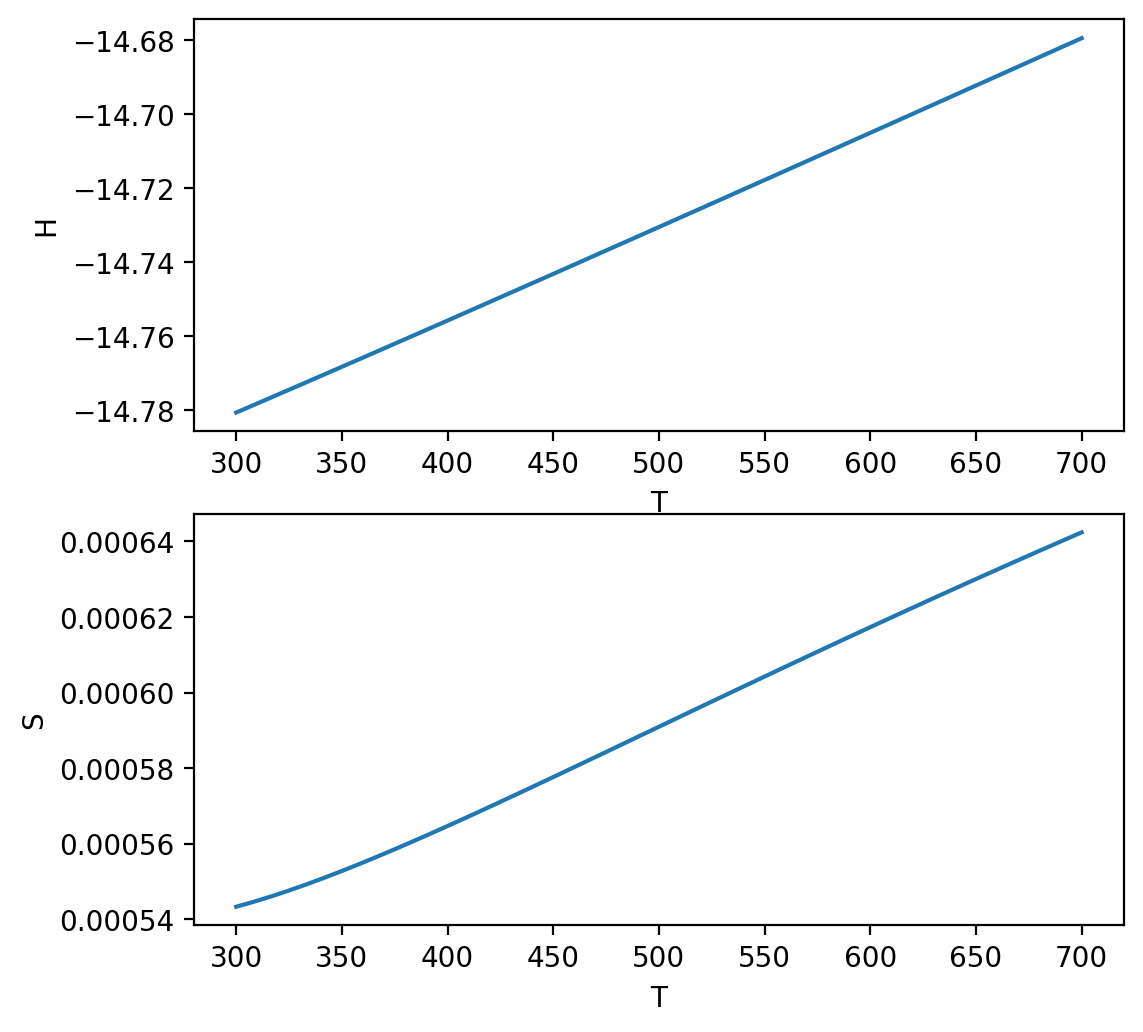

In [18]:
from ase.build import molecule
from pmutt import plot_1D
from pmutt.statmech import StatMech, presets
from pmutt.statmech.vib import DebyeVib
from pmutt.statmech.elec import GroundStateElec

# 1. Create H2O molecule
H2O_statmech = StatMech(atoms=molecule('H2O'),
                        potentialenergy=-6.7598,
                        symmetrynumber=2,
                        spin=0,
                        vib_wavenumbers=[3825.434, 3710.264, 1582.432],
                        **presets['idealgas'])


# 2. Calculate Gibbs energy of H2O at T = 500 K and P = 2 bar
T = 500. # K
P = 2. # bar
G_H2O = H2O_statmech.get_G(units='eV', T=T, P=P)
print('G_H2O(T = 500 K, P = 2 bar) = {} eV'.format(G_H2O))


# 3. Create Cu crystal
Cu_vib = DebyeVib(debye_temperature=310., interaction_energy=0.)
Cu_elec = GroundStateElec(potentialenergy=-14.922356)
Cu_statmech = StatMech(vib_model=Cu_vib, elec_model=Cu_elec)


# 4. Plot the 1D profile for H and S between 300 K and 700 K
T = np.linspace(300., 700.) # K
f2, ax2 = plot_1D(Cu_statmech,
                  x_name='T', x_values=T,
                  methods=('get_H', 'get_S'),
                  get_H_kwargs={'units': 'eV'},
                  get_S_kwargs={'units': 'eV/K'})
f2.set_size_inches(6, 6)
f2.set_dpi(200)
plt.show()

<a id='section_12_3'></a>

## 12.3. Solution to Exercise 3
[Link to Exercise 3](#section_11)

In [19]:
from pmutt.io.thermdat import read_thermdat
from pmutt import pmutt_list_to_dict
from pmutt.reaction import Reaction

# 1. Read the thermdat file
species_list = read_thermdat('./output/thermdat')

# 2. Convert the list of Nasa to a dictionary of Nasa
species_dict = pmutt_list_to_dict(species_list)

# 3. Create a Reaction from the specified string
rxn = Reaction.from_string('NH3(S) + RU(S) = TS1_NH3(S) = NH2(S) + H(S)', species_dict)

# 4. Calculate the reaction enthalpy
H_rxn = rxn.get_delta_H(units='kcal/mol', T=298.)
print('H_rxn = {:.1f} kcal/mol'.format(H_rxn))

# 5. Calculate the forward activation energy
Ea = rxn.get_E_act(units='kcal/mol', T=298.)
print('Ea_fwd = {:.1f} kcal/mol'.format(Ea))

H_rxn = -12.3 kcal/mol
Ea_fwd = 24.6 kcal/mol
